<center>
    <h1> Scientific Programming in Python  </h1>
    <h2> Topic 2: NumPy and Efficient Numerical Programming </h2> 
</center>

In [50]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def image_plot(data, title='FITS image'):
    plt.figure(figsize=(10,10))
    im = plt.imshow(data, cmap=plt.cm.afmhot, interpolation=None)
    plt.title(title)
    #plt.axis('off')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [51]:
# first we load the data:
data = np.load("orion.npy")

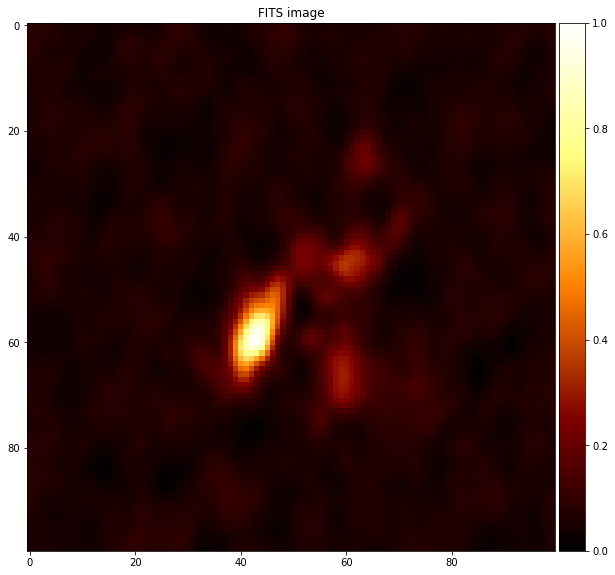

In [52]:
image_plot(data)

In [53]:
#Calculo de RMS
RMS = (data**2)
RMS = RMS.sum()
RMS = math.sqrt((RMS/10000))

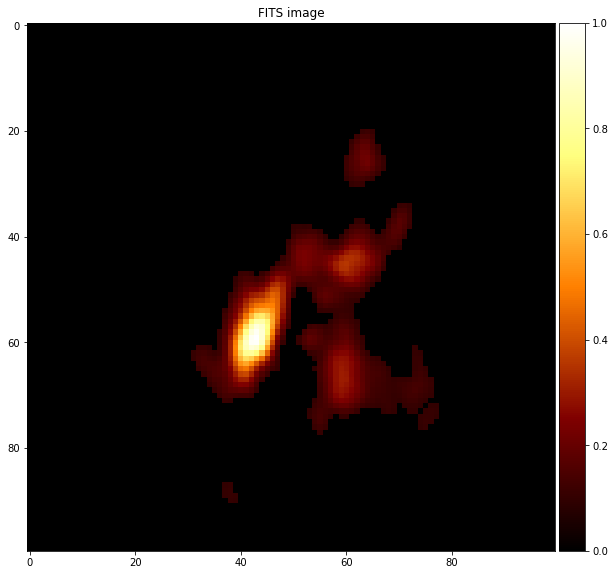

In [57]:
#Generación nueva matriz
a = np.empty_like (data)
boleana = data < RMS
a[:] = data
a[a<RMS] = 0
image_plot(a)




In [55]:
#Funcion apply filter
def apply_filter(data, mask, kernel_filter):
    for i in range(1,100):
        for j in range(1,100):
            if(np.logical_not(mask[i,j])):
                continue
            aux = data[i-1:i+2,j-1:j+2]  #Matriz 3x3
            aux = (aux * kernel_filter).sum()
            data[i,j] = aux
    return None

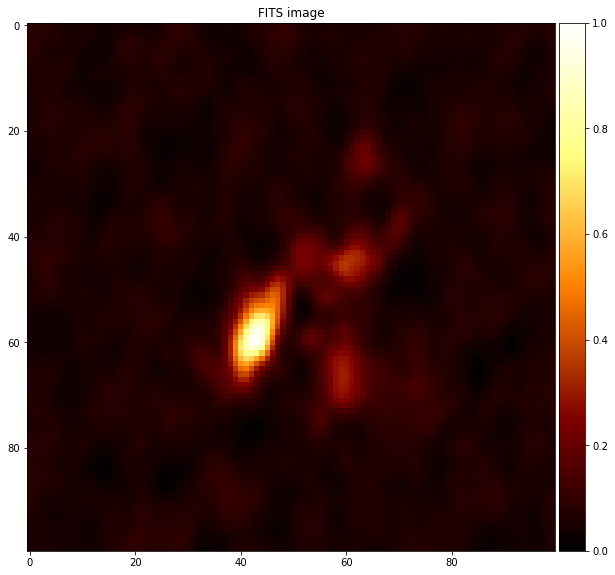

In [58]:
kernel_filter = 1./16. * np.array([[1,2,1], [2,4,2], [1,2,1]])
apply_filter(data,booleana,kernel_filter)
image_plot(data)
